In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data loading
df = pd.read_csv("../data/EngineFaultDB_Sorted_EGO_v2.csv")

In [3]:
df.shape

(31000, 16)

In [4]:
df.head()

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR,EGO voltage
0,0,1.227,0.810,96.459,0.922,1066.452,2.410,10.158,25.055,0.592,169.888,13.516,0.946,1.019,14.984,0.430647
1,0,3.488,1.910,7.373,5.208,1074.087,2.953,12.030,24.567,0.466,200.222,14.336,1.074,1.039,15.277,0.410681
2,0,1.237,0.810,100.632,0.907,1086.029,2.439,9.715,24.876,0.584,169.844,13.725,0.954,1.044,15.341,0.406320
3,0,1.268,0.820,98.298,0.922,1087.044,2.503,9.841,25.507,0.622,168.597,13.591,0.911,0.987,14.506,0.463220
4,0,1.421,0.789,97.481,0.900,1088.329,2.370,9.676,24.461,0.590,171.262,13.712,0.956,1.045,15.359,0.405094


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31000 entries, 0 to 30999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fault                31000 non-null  int64  
 1   MAP                  31000 non-null  float64
 2   TPS                  31000 non-null  float64
 3   Force                31000 non-null  float64
 4   Power                31000 non-null  float64
 5   RPM                  31000 non-null  float64
 6   Consumption L/H      31000 non-null  float64
 7   Consumption L/100KM  31000 non-null  float64
 8   Speed                31000 non-null  float64
 9   CO                   31000 non-null  float64
 10  HC                   31000 non-null  float64
 11  CO2                  31000 non-null  float64
 12  O2                   31000 non-null  float64
 13  Lambda               31000 non-null  float64
 14  AFR                  31000 non-null  float64
 15  EGO voltage          31000 non-null 

In [6]:
df['Fault'].value_counts()

Fault
0    16000
2    15000
Name: count, dtype: int64

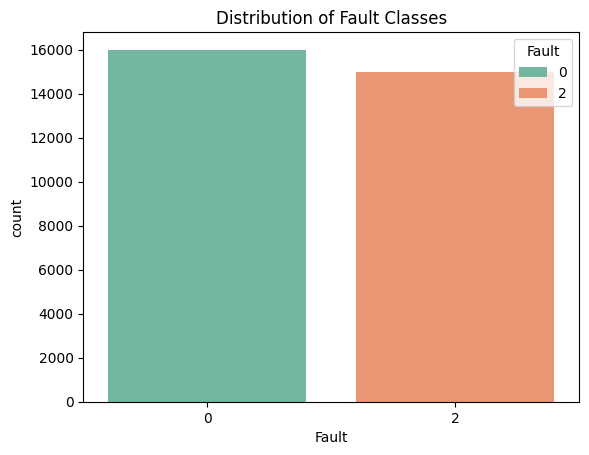

In [7]:
sns.countplot(data=df, x='Fault', palette='Set2', hue="Fault")
plt.title('Distribution of Fault Classes')
plt.show()

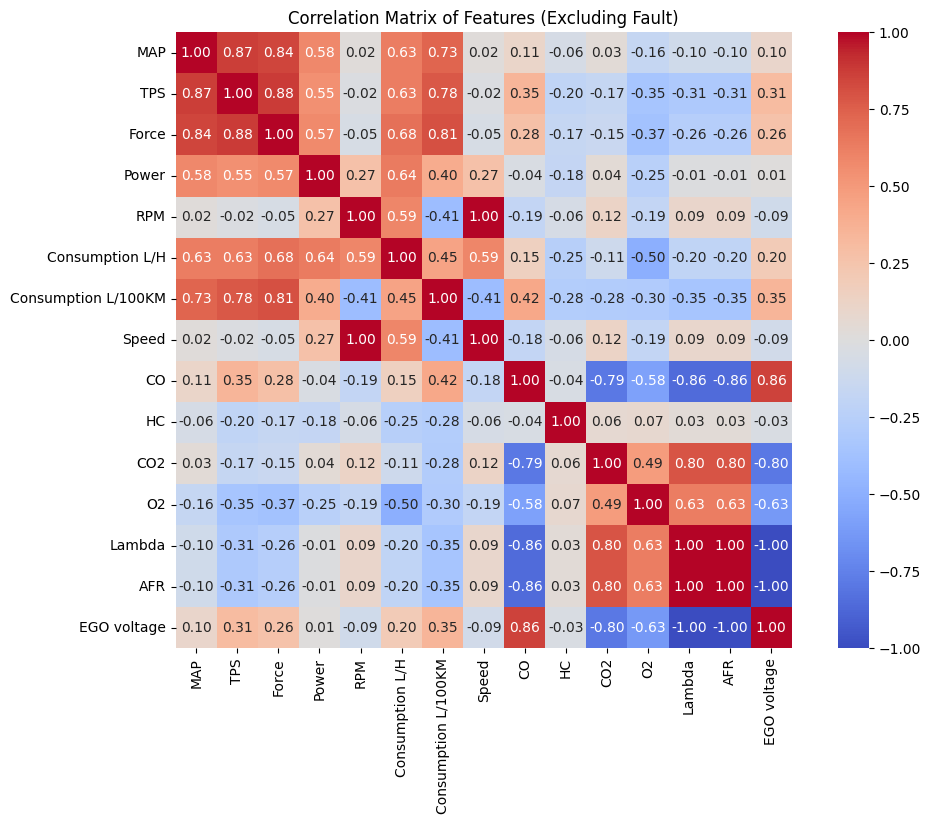

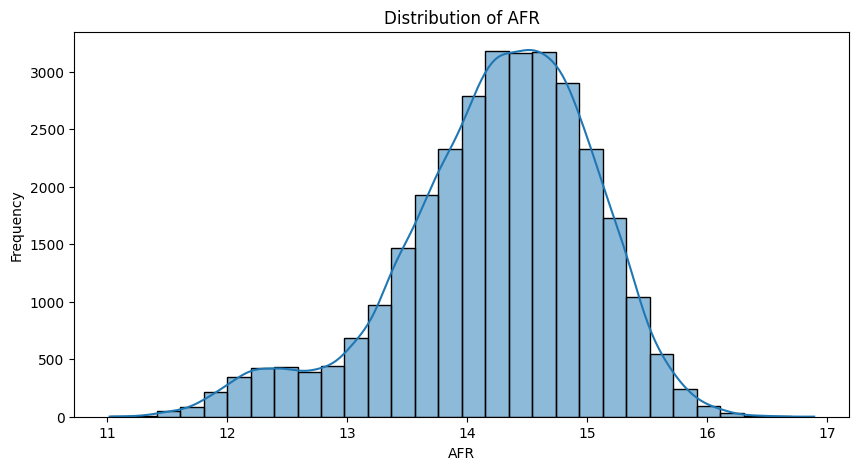

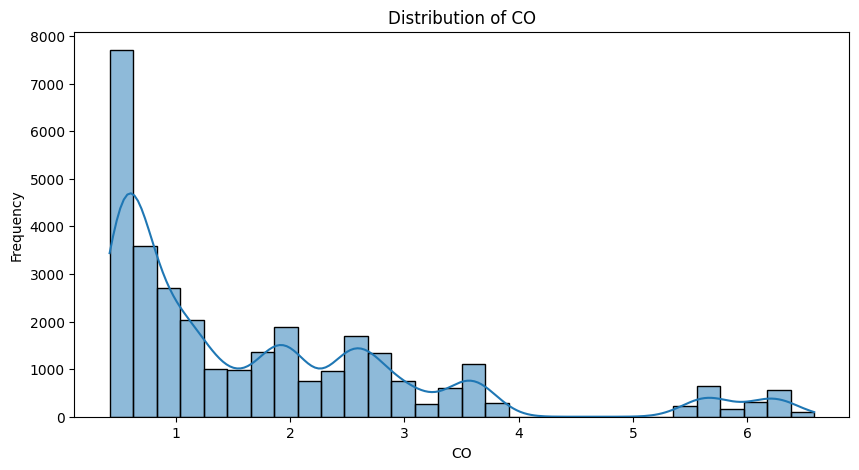

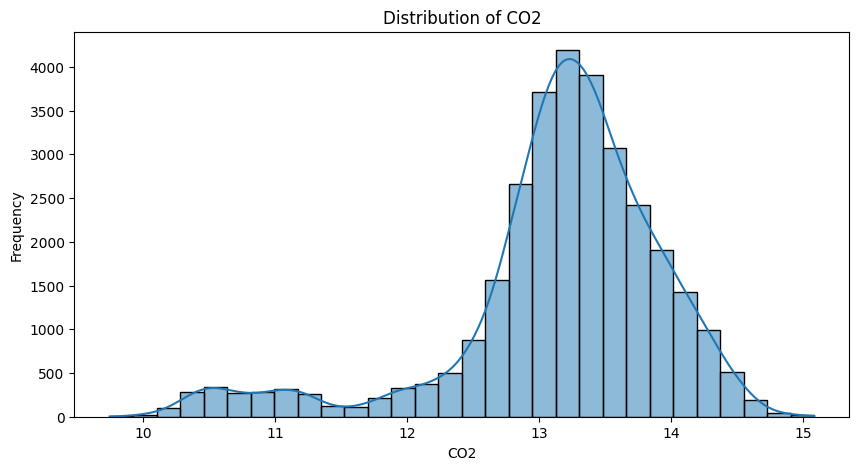

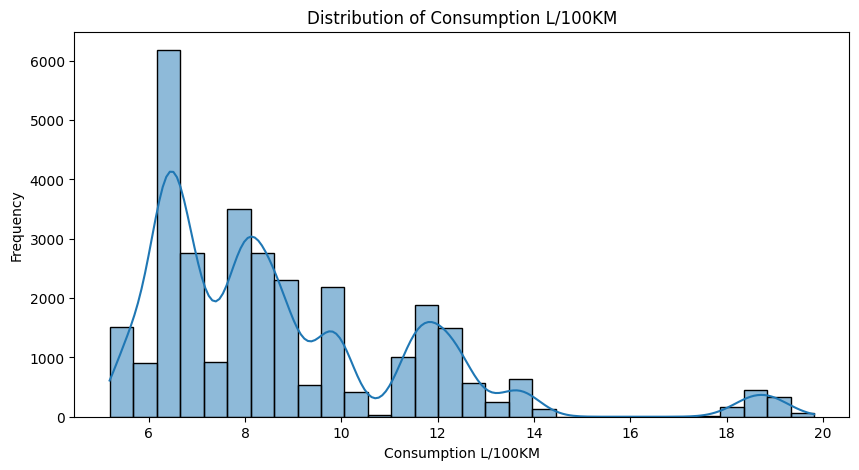

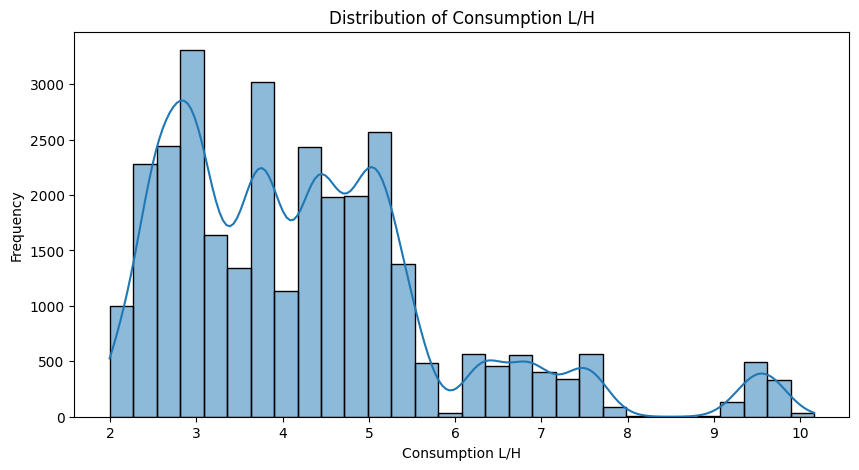

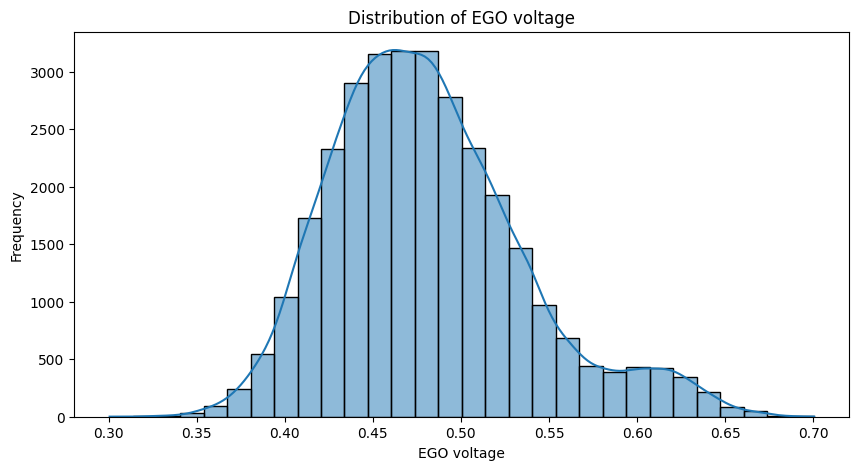

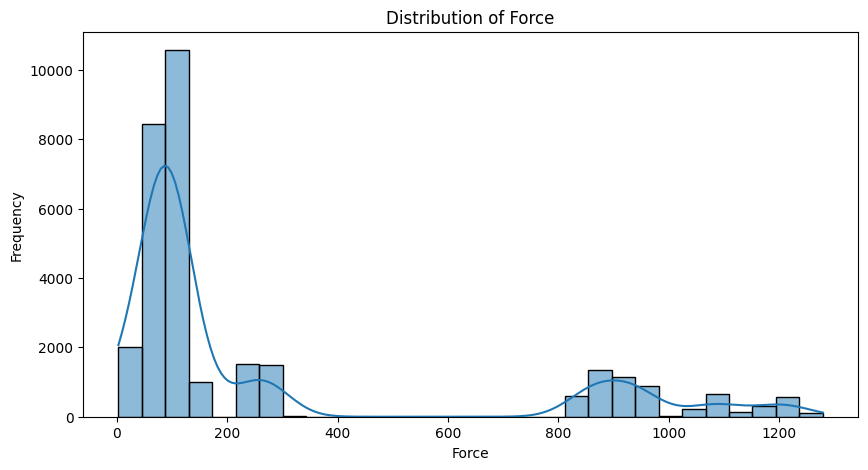

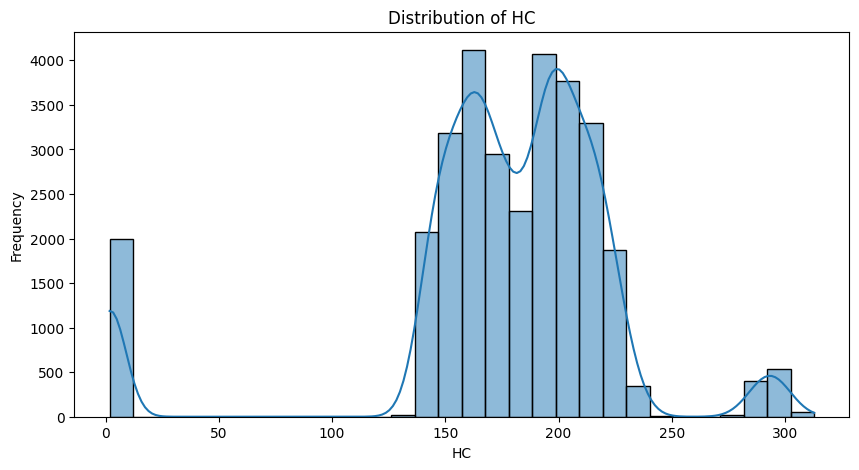

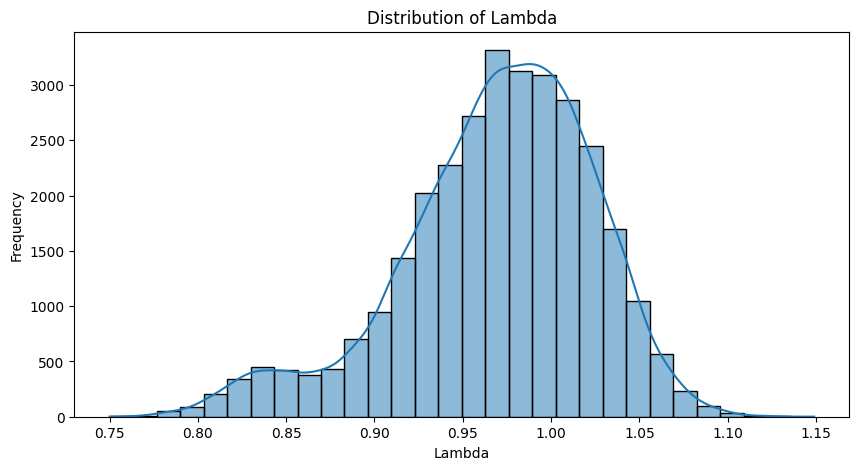

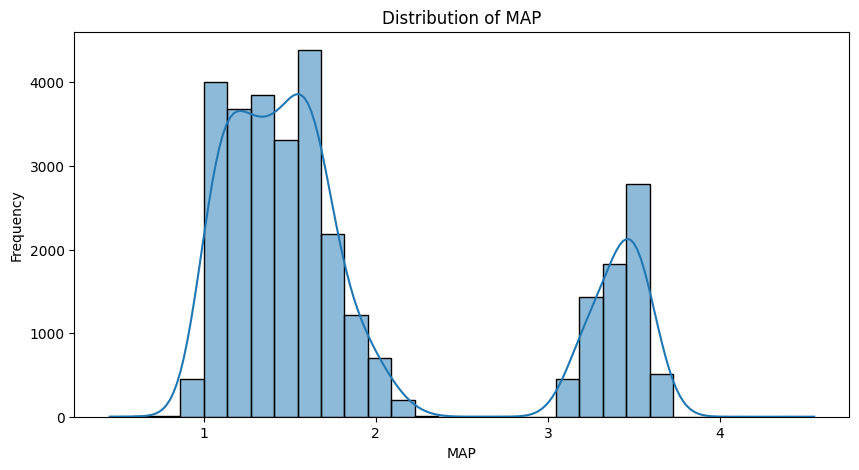

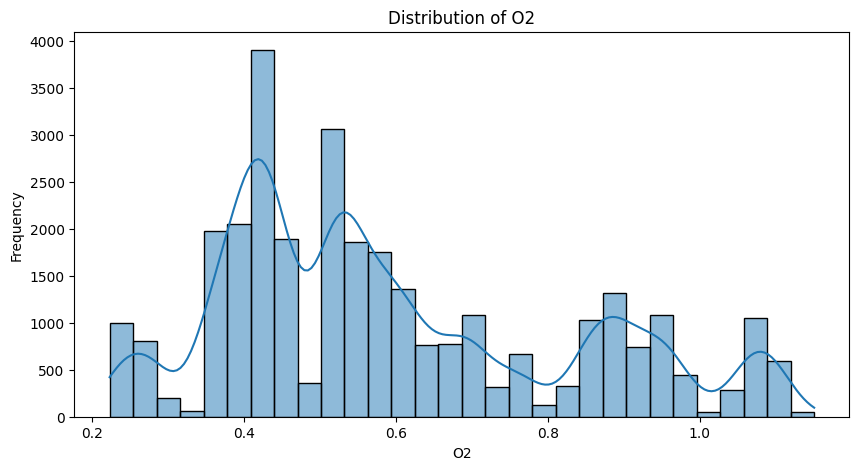

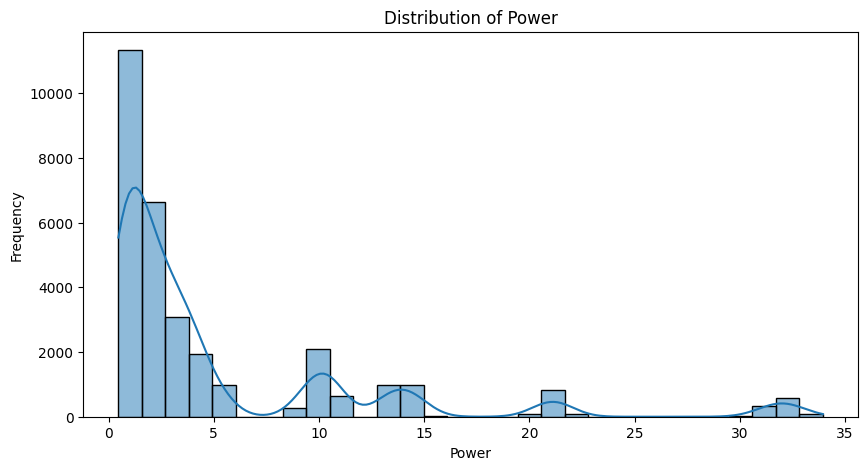

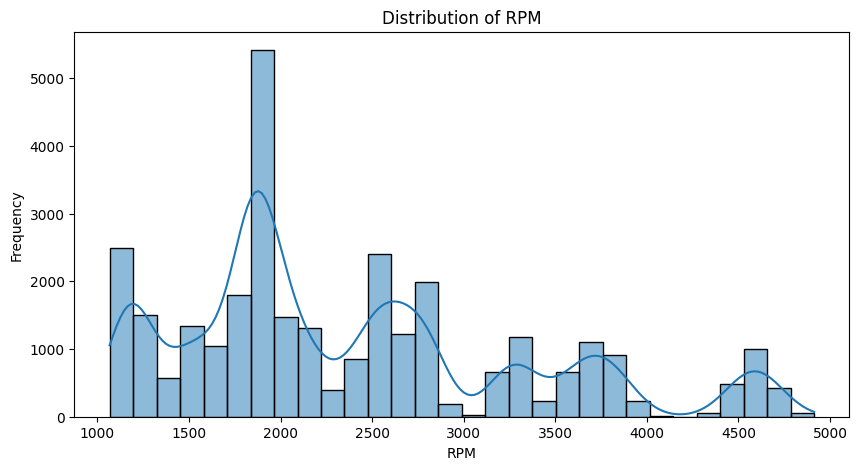

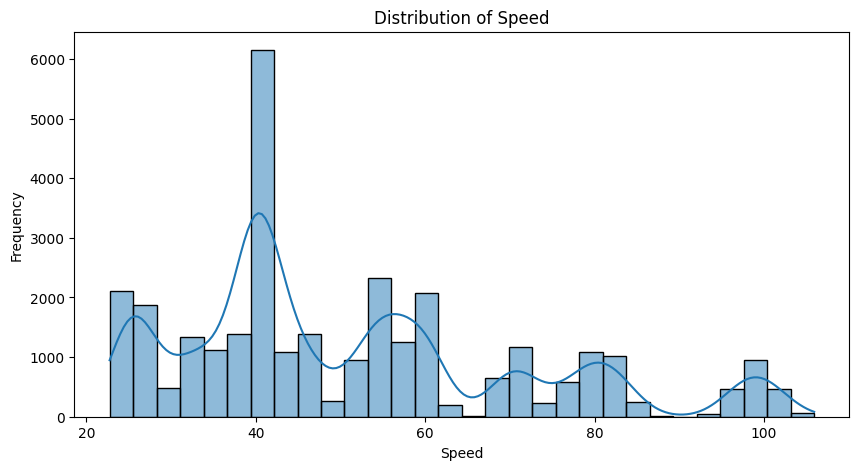

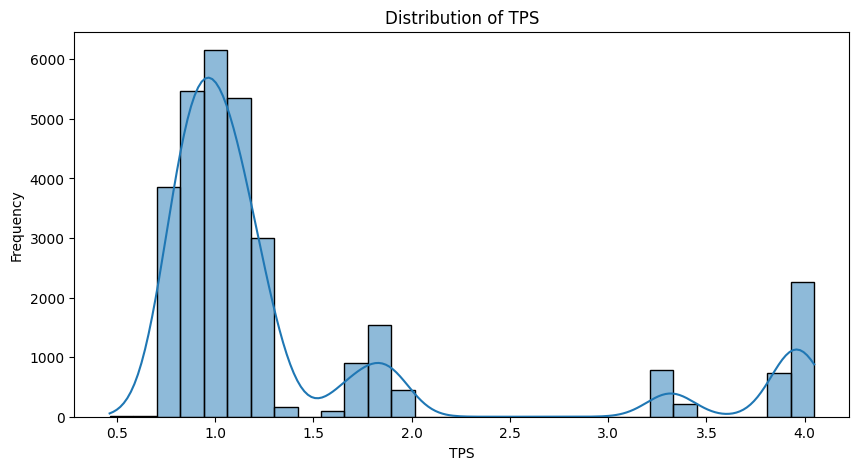

In [8]:
# Analyzing all other features except 'Fault'

# Descriptive statistics for numerical features excluding 'Fault'
descriptive_stats = df.drop(columns=['Fault']).describe()
# Correlation matrix to understand relationships between features excluding 'Fault'
correlation_matrix = df.drop(columns=['Fault']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features (Excluding Fault)')
plt.show()

# Visualizing distributions of key features excluding 'Fault'
features_to_analyze = df.columns.difference(['Fault'])
for feature in features_to_analyze:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



## Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [10]:
# Splitting the data into features and target variable
X = df.drop(columns=['Fault'])
y = df['Fault']

# Splitting the data into training and testing sets with 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True, stratify=y)

Model: Random Forest
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      3100
   macro avg       1.00      1.00      1.00      3100
weighted avg       1.00      1.00      1.00      3100



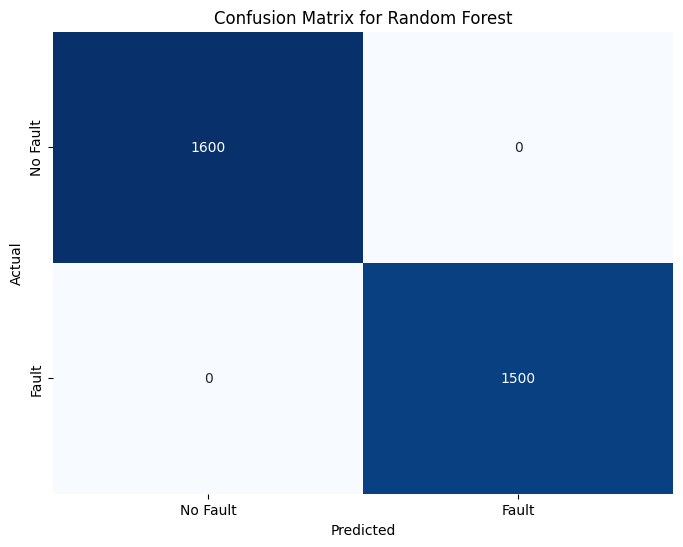

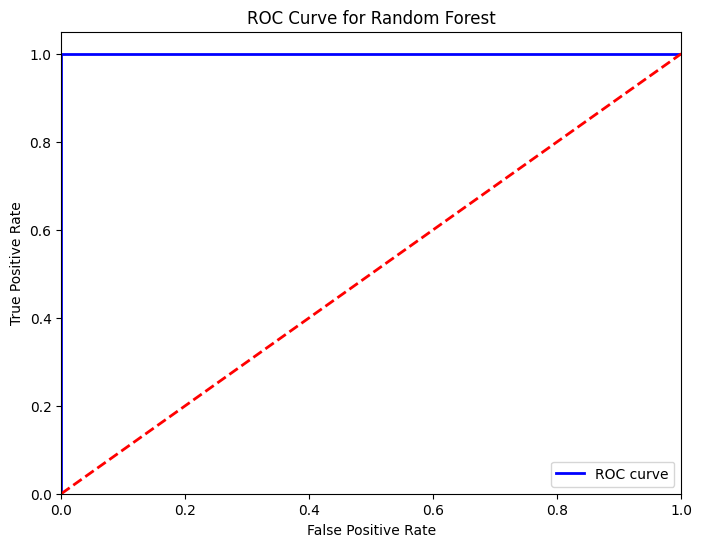

Model: Gradient Boosting
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      3100
   macro avg       1.00      1.00      1.00      3100
weighted avg       1.00      1.00      1.00      3100



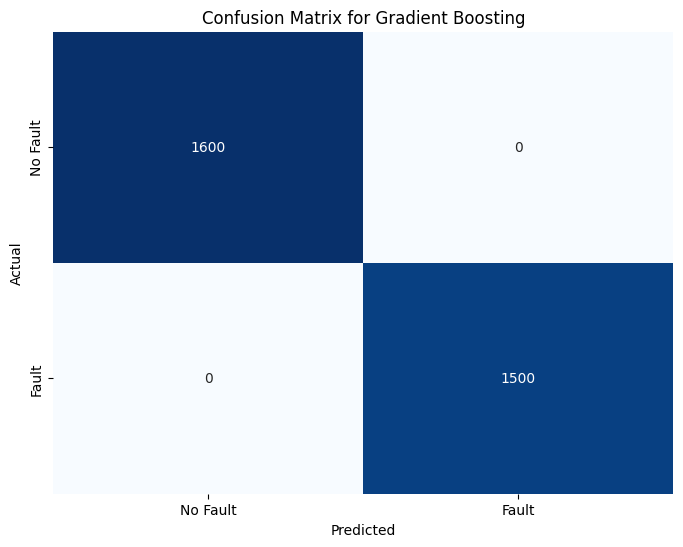

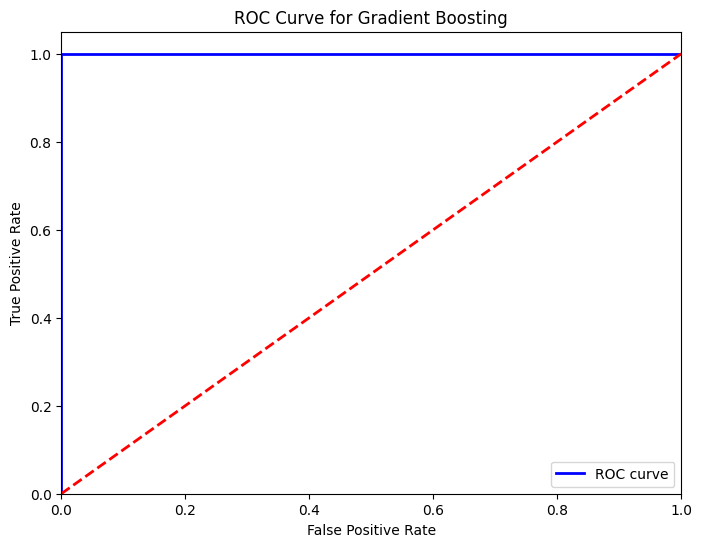

Model: Extra Trees
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      3100
   macro avg       1.00      1.00      1.00      3100
weighted avg       1.00      1.00      1.00      3100



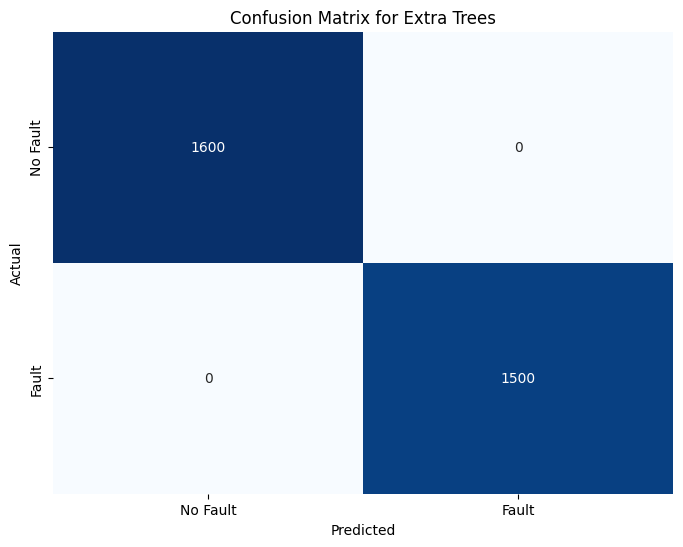

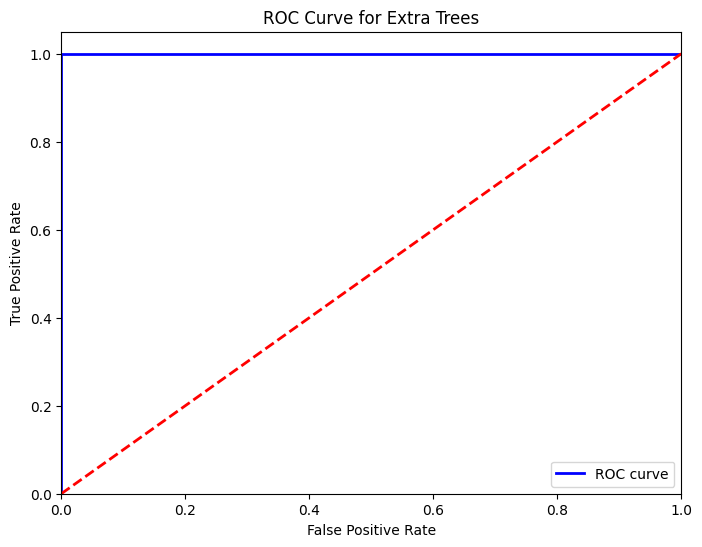

Model: Decision Tree
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      3100
   macro avg       1.00      1.00      1.00      3100
weighted avg       1.00      1.00      1.00      3100



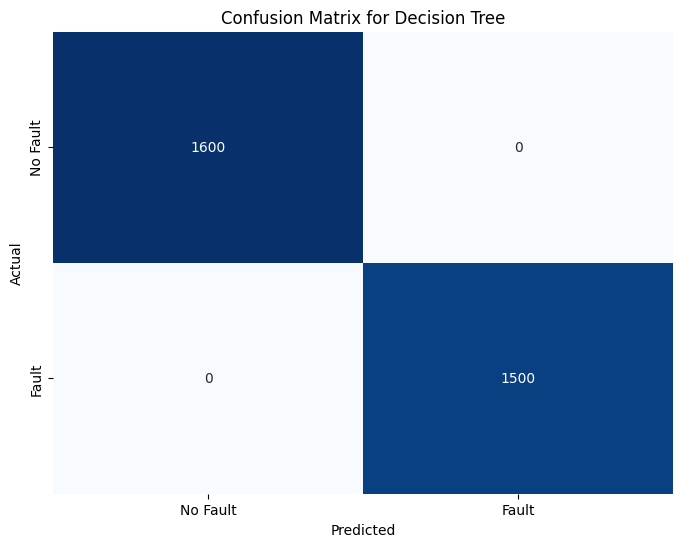

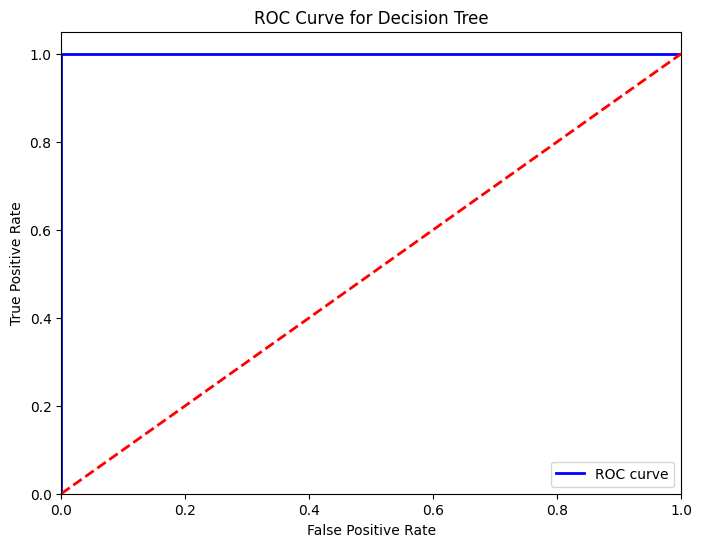

Model: Logistic Regression
Accuracy: 0.8932
AUC: 0.9635
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1600
           2       0.90      0.88      0.89      1500

    accuracy                           0.89      3100
   macro avg       0.89      0.89      0.89      3100
weighted avg       0.89      0.89      0.89      3100



c:\Users\Timmy-afolami\anaconda3\envs\betzflip_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


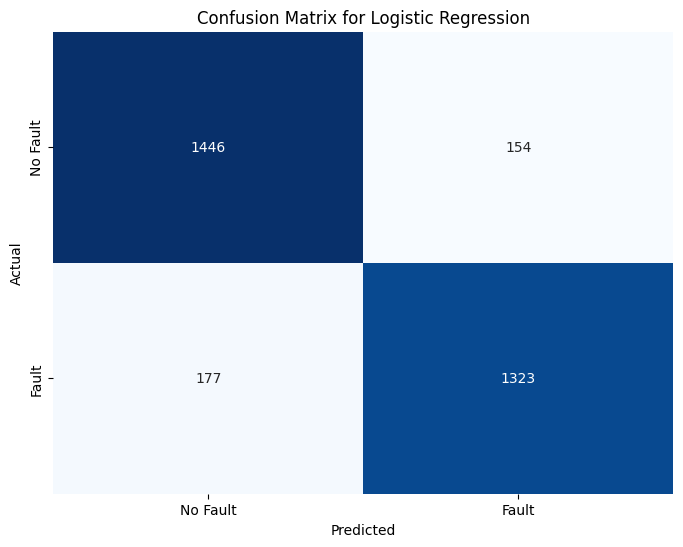

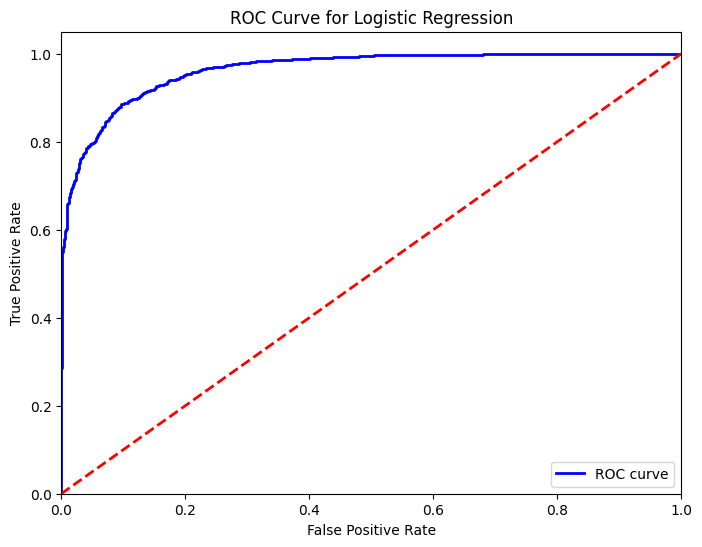

In [11]:
# Training and evaluating each model separately

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# List of models to train
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred)

    # Displaying metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Plotting confusion matrix and ROC curve
    plot_confusion_matrix(cm, model_name)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=2)
    plot_roc_curve(fpr, tpr, model_name)



100%|===================| 55743/55800 [07:00<00:00]        

<Figure size 640x480 with 0 Axes>

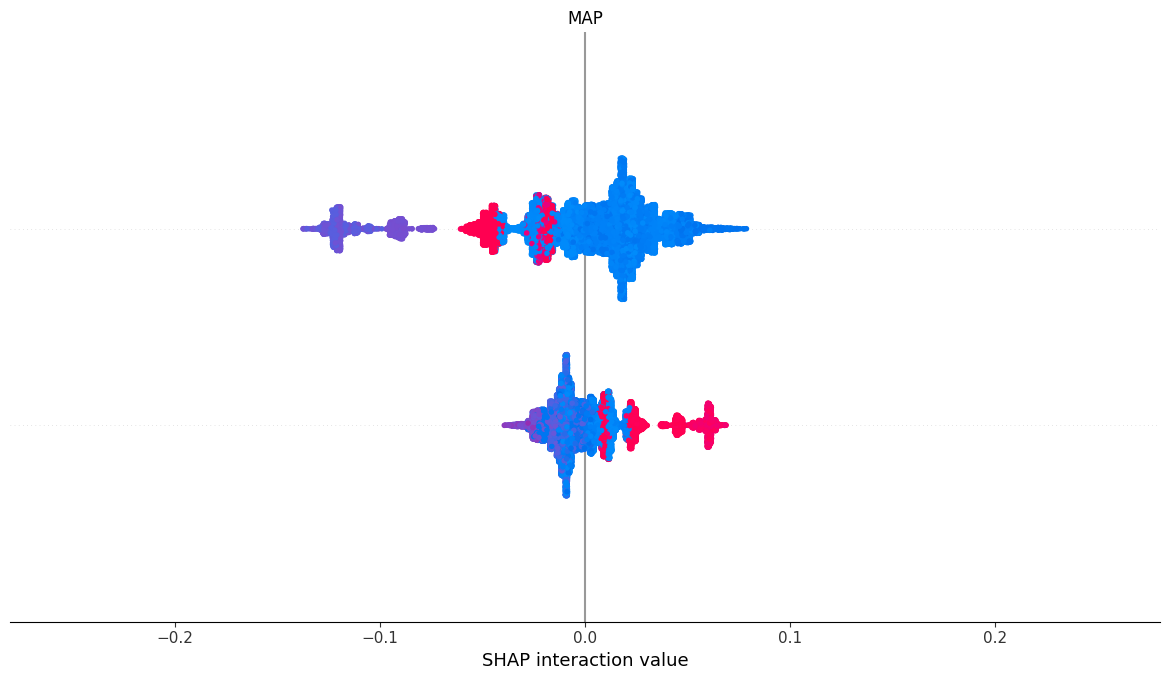

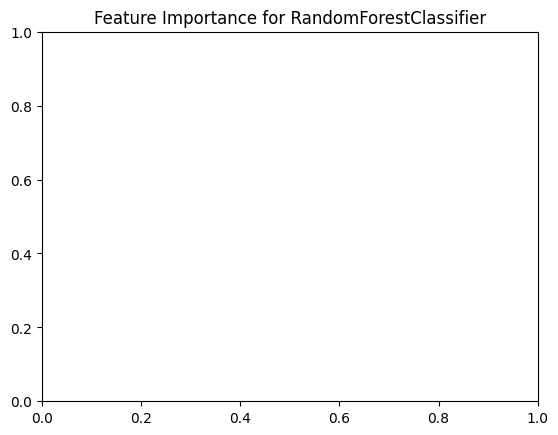

In [13]:
import shap

# Function to plot feature importance using SHAP
def plot_feature_importance(model, X_train):
    # Create the explainer
    explainer = shap.Explainer(model, X_train)
    # Disable additivity check to avoid the error
    shap_values = explainer(X_train, check_additivity=False)
    
    # Plotting the SHAP values (summary_plot creates its own figure)
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    plt.title(f'Feature Importance for {model.__class__.__name__}')
    plt.show()

# Ensure that 'models' is defined and X_train matches the training data.
first_model_name, first_model = list(models.items())[0]
plot_feature_importance(first_model, X_train)
